<font size=7>Arrows Graph

Here we crete the vector plots of the information flow directions for neurons

# Set Up Notebook

In [4]:
#from human_hip.spike_data import read_phy_files

In [2]:
#%run  "/workspaces/human_hippocampus/dev/elliott/safety/cross_correlation/Instant_Firing_Rate_Source_Code.ipynb"

In [48]:
import pickle
from human_hip.spike_data import latencies, cross_sttc, plotLagsLayout
import numpy as np

load data

In [2]:

file = open('/workspaces/human_hippocampus/data/ephys/2023-04-02-e-hc328_unperturbed/sd_ca1_curated.pkl', 'rb')
sd = pickle.load(file)
file.close()

In [9]:
print(sd.N**2 , "Starting Pairs")

18496 Starting Pairs


# Curation 1 - Basics

### STTC Theshold

get all latencies whose STTC is above some minimum STTC cuttoff

In [10]:
sttc_delta = 20
sttc_neo = sd.spike_time_tilings( sttc_delta )    # sttc matrix
sttc_cutoff = 0.04   

pairs = []                            # get list (without duplicates) of all pairs above cutoff (excluding diagonal)
for i in range(sd.N):
    for j in range(i+1,sd.N):
        if sttc_neo[i,j] > sttc_cutoff:
            pairs.append([i,j])

In [42]:
print( len(pairs), "pairs above sttc cutoff")

360 pairs above sttc cutoff


### Latencies Threshold

Get all latencies whose median latency is above 1 ms Latency Cuttoff

In [13]:
pairs_late = []
lags_late = []
latency_cuttoff = 1
for pair in pairs:
    pair_latencies = latencies( pair[0], pair[1], sd, ms_cutoff=20)
    latency= np.median(pair_latencies)
    if abs(latency)> latency_cuttoff:
        pairs_late.append( pair )
        lags_late.append( latency )
pairs= pairs_late

In [15]:
print( len(pairs_late), "pairs above latencency cutoff")

360 pairs above latencency cutoff


#  Curation 2 - Cross STTC

## <font color="blue"> crossSTTC function

In [10]:
# def crossSTTC( n1, n2, sd, delt ):
#     assert len(sd.neuron_attributes) == len(sd.train) 
#     sttcs = []
#     for i in range(-1000,1001):
#         sd.train.append( sd.train[n1]+i )
#         sttcs.append( sd.spike_time_tiling( len(sd.neuron_attributes) , n2, delt= delt) )
#         sd.train.pop(-1)
#     return np.array(sttcs)

In [23]:
pair = pairs_late[0]
cross_sttc_delta = 20

In [24]:
cross_sttc( pair[0], pair[1], sd, cross_sttc_delta )

array([0.00380159, 0.00481513, 0.00278826, ..., 0.0162457 , 0.01523124,
       0.01421699])

## cross STTC across all paris

do cross sttc for all pairs

In [35]:
cross_lag  = []
pair_cross_sttc = []
cross_sttcs = []
count = 0
cross_sttc_delta = 20
for pair in pairs_late:
    count+=1
    if count%20 ==0:
        print(count)
    sttcs = cross_sttc( pair[0], pair[1], sd, delt=cross_sttc_delta)
    cross_sttcs.append(sttcs)
    pair_cross_sttc.append( np.amax(sttcs) )
    max_args = np.argwhere(sttcs == np.amax(sttcs)) - 1000 
    cross_lag.append( max_args[np.argmin(np.abs(max_args))][0] ) # if multiple maxima, take the one closest to zero
cross_lag = np.array(cross_lag)

20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360


In [45]:
max_args

array([[-22]])

In [46]:
max_args[np.argmin(np.abs(max_args))][0] 

-22

In [47]:
np.abs(max_args)

array([[22]])

In [44]:
cross_lag

array([   1,   13,  -19,  -19,   20,   16,  -21,   24, -272,   -8,  -11,
         31,   15,  517,   61, -566,  -22,  447, -902,  918,  -46,   18,
          5,   20,   38,  -20,   -9,   32,    6,   28, -805,  -22,   -5,
         32,   -8, -512,    5,   32,    2,  906,  -19,  -20,   -1,  688,
          1,   32,  -18,   -3,  777,  -21,   51,    7,   78,    4, -298,
         -4,  229,  229,  647,    1,   31,   47,    5,   95,   18,   44,
        -66,   31, -490,  -16,   38,   22,   36,   95,    6,   19,  -47,
        270,   -3,   22,   21, -638,  -22,  395,   -5,   43,  -10,  -52,
        -26,  -23,   -8,   10,    3,   -6,   -2,  -22,  -10,  -34,   -6,
         21,   71,  -21,   -1,   -6,  786,   46,  785,  -24,  -16,   46,
          3, -108,   21,   11, -173, -986,  479,   19, -935, -935,  -29,
       -853, -281,  -12,  397,   -1,  931,   -3,   27,   23,   35, -933,
         20,  456,   26,   22,   15,   16,    2,   17,   -3,   27,  114,
       -327,   -4,   20, -935, -935,  -25, -609,   

## Curate Pairs

Get pairs where max cross correlation is between some cutoff

In [36]:
min_lag_cutoff = 2
max_lag_cutoff = 15
to_keep = np.where((np.abs(cross_lag)< max_lag_cutoff) & (np.abs(cross_lag)> min_lag_cutoff) & (cross_lag!=0) )[0]

In [37]:
to_keep

array([  1,   9,  10,  22,  26,  28,  32,  34,  36,  47,  51,  53,  55,
        62,  74,  78,  84,  86,  90,  91,  92,  93,  96,  98, 103, 110,
       113, 123, 127, 140, 144, 155, 158, 159, 161, 163, 166, 169, 172,
       175, 180, 181, 184, 187, 190, 198, 199, 202, 224, 225, 228, 230,
       243, 246, 255, 258, 261, 265, 266, 267, 274, 280, 289, 291, 298,
       305, 325, 331, 336, 338, 339, 340, 344, 347, 348, 355, 356])

In [18]:
#pairs_corr

In [38]:
len(to_keep)

77

In [39]:
len(to_keep)

77

In [40]:
pairs_corr = np.array(pairs)[ to_keep ] 
lags_corr = np.array(cross_lag)[to_keep]
sttcs_corr = np.array(cross_sttcs)[to_keep]

In [41]:
import warnings
warnings.filterwarnings("ignore")

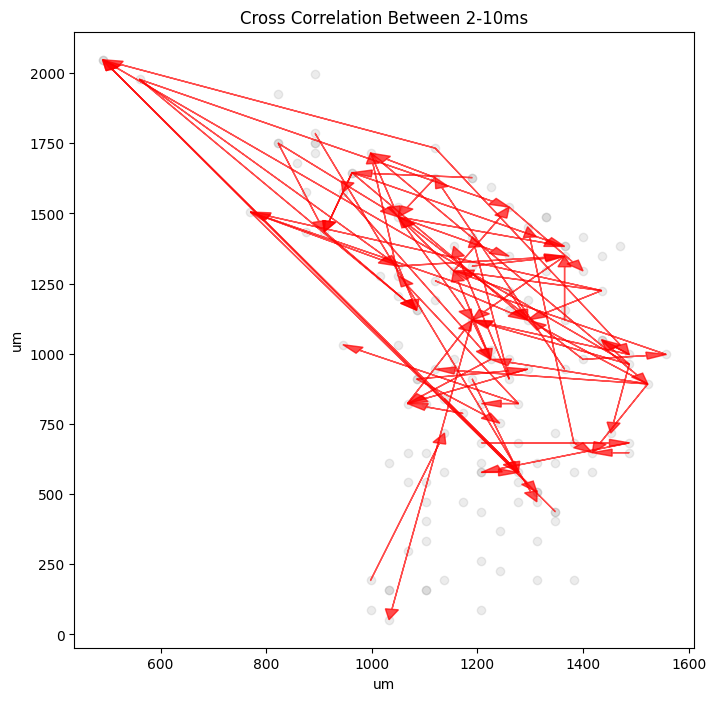

In [16]:
#print(f"Delta: 30, Lag_Cutoff: 10")
#print(f"Delta: {delta}, Lag_Cutoff: {lag_cutoff}")
plotLagsLayout(sd, lags_corr, pairs_corr)


## <font color="green">Save results

get neurons x/y locations for saving

In [24]:
neuron_xy = []
for neuron in sd.neuron_data[0].values():
    neuron_xy.append( [neuron['position'][0], neuron['position'][1]] )
neuron_xy = np.array(neuron_xy)

save data

In [25]:
arrows_data= {"pairs":pairs_corr, "lags":lags_corr, "neuron_xy":neuron_xy, "sttcs":sttcs_corr, "sttc_delta":sttc_delta,  "cross_sttc_delta":cross_sttc_delta,
              "min_lag_cutoff":min_lag_cutoff, "max_lag_cutoff":max_lag_cutoff }

The following line saves data, it's commented out so to not accidently overwrite data

In [26]:
# with open( '/workspaces/human_hippocampus/data/arrows/pairs/deltas_20ms_cuttoff_2_15ms.pkl' , 'wb') as file:
#    pickle.dump( arrows_data, file)

# Curation 3 - TJ

In [ ]:
#arrows_data= {"pairs":pairs_corr, "lags":lags_corr, "sttcs":sttcs_corr, "sttc_delta_1":delta,  "":lag_cutoff}

In [ ]:
#with open( '/workspaces/human_hippocampus/data/arrows/pairs/deltas_20ms_cuttoff_2_15ms.pkl' , 'wb') as file:
#    pickle.dump(ar file)

# Analyze STTC

 crossSTTC values

In [17]:
@interact_manual
def showSttcs(num=(0,len(sttcs_corr)-1)):
    plt.plot( sttcs_corr[num] )

interactive(children=(IntSlider(value=39, description='num', max=78), Button(description='Run Interact', style…

In [ ]:
#lags_corr
#pairs_corr

get lags to all be positive, switch pairs accordingly

In [34]:
for i in np.where( lags_corr <0 )[0]:
    pairs_corr[i] =  [ pairs_corr[i][1], pairs_corr[i][0] ]
lags_corr = np.abs(lags_corr)

plot latency analysis for single pair

In [24]:
@interact_manual(num=(0,len(pairs_corr)-1))
def analyzePair(num):
    plotPairAnalysis( pairs_corr[num][0], pairs_corr[num][1], sd)

interactive(children=(IntSlider(value=39, description='num', max=78), Button(description='Run Interact', style…

# Analyze Instant Firing Rate

calculate all cross correlations

In [115]:
smoothing = 30
max_isi = 0.035

In [116]:
lags_ifr = []
count = 0
for pair in pairs:
    count +=1 
    if count%100 ==0:
        print(count)
    instant_n1 = movingAverage( instantFiringRate( sd, pair[0], max_isi= max_isi), smoothing) #,max_isi=0.1) , 12)
    instant_n2 = movingAverage( instantFiringRate( sd, pair[1], max_isi= max_isi), smoothing) #,max_isi=0.1) , 12)
    lags_ifr.append( maxCorrelationShift( instant_n1, instant_n2 ) )

100
200
300


Get all correlations between 2-10ms

In [117]:
lag_cutoff = 15
to_keep = np.where((np.abs(lags_ifr)< lag_cutoff) & (np.abs(lags_ifr)> 1) & (lags_ifr!=0) )[0]
len(to_keep)

36

In [118]:
pairs_ifr = np.array(pairs)[ to_keep ] 
lags_ifr = np.array(lags_ifr)[to_keep]

In [40]:
#print(f"Delta: 30, Lag_Cutoff: 10")
print(f"max_isi: {max_isi}, Smoothing: {smoothing}, Lag_Cutoff: {lag_cutoff}")
plotLagsLayout(sd, lags_ifr, pairs_ifr)

NameError: name 'max_isi' is not defined

make all lags positive, switch values in pair when needed

In [121]:
for i in np.where( lags_ifr <0 )[0]:
    pairs_ifr[i] =  [ pairs_ifr[i][1], pairs_ifr[i][0] ]
lags_corr = np.abs(lags_ifr)

Analyze latencies

In [22]:
@interact_manual(num=(0,len(pairs_ifr)-1))
def analyzePair(num):
    plotPairAnalysis( pairs_ifr[num][0], pairs_ifr[num][1], sd)

NameError: name 'pairs_ifr' is not defined

# Create Direction Raster

Create a pickle file of each time an arrow "fires"

In [87]:
latency_times = {}
for pair in pairs_corr:
    #latency_times[ (pair[0],pair[1]) ] = getLatencyTimes( pair[0], pair[1], sd, ms_cutoff=15, directed=False)
    latency_times[ (pair[0],pair[1]) ] =  getLatencyTimes( pair[0], pair[1], sd, ms_cutoff=15, directed=True )

In [88]:
file = open('/home/jovyan/work/Human_Hippocampus/2023_04_02_directed_latency_times_3.pkl', 'wb')
pickle.dump(latency_times, file)
file.close()


In [34]:
#latency_times

{(0,
  1): array([  2414.65,  19076.05,  19724.8 ,  24450.55,  25065.4 ,  25552.45,
         25775.45,  42421.5 ,  42461.45,  46608.7 ,  57111.5 ,  57495.7 ,
         78883.65,  83958.55,  84205.4 ,  85694.25,  89732.2 ,  97890.4 ,
        100781.55, 101212.35, 103063.45, 103196.1 , 105328.4 , 107400.25,
        108520.9 , 110621.1 , 112094.55, 112254.05, 117964.55, 118491.1 ,
        122040.35, 122658.4 , 122716.95, 125142.55, 125560.75, 129700.35,
        130041.45, 132366.  , 132935.5 , 134125.2 , 137563.25, 138486.4 ,
        141534.65, 142580.7 , 143319.75, 148542.4 , 149791.9 , 153508.7 ,
        154044.65, 157244.55, 160320.6 , 160778.65, 164581.8 , 165502.6 ,
        167053.3 , 167093.2 , 170508.05, 171020.75, 172312.8 , 185571.7 ,
        186287.9 , 188262.  , 188578.6 , 189174.65, 192442.65, 195522.55,
        201414.25, 203483.3 , 204426.95, 206272.5 , 206864.6 , 208935.05,
        212007.85, 212591.15, 213647.25, 217212.45, 219805.5 , 220097.7 ,
        227016.3 , 229124.5 

# <font color="brown">Safety Code